Amount of Qubits: 3


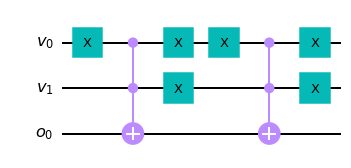

In [20]:
from qiskit import QuantumCircuit
from qiskit.aqua.components.oracles import TruthTableOracle
from qiskit.aqua.algorithms import Grover
import numpy as np

def calculateTruthTableString(**kid):
    
    print("Amount of Qubits: " + str(kid["amountSearchQbits"]))
    # Damians work
     
    return '1010';


## Main
t = 2   # no. of counting qubits
n = 3   # no. of searching qubits

# https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html
qc = QuantumCircuit(n+t, t) # Circuit with n+t qubits and t classical bits

# https://qiskit.org/documentation/stubs/qiskit.aqua.components.oracles.TruthTableOracle.html
truthtable = calculateTruthTableString(amountSearchQbits = n)
oracle = TruthTableOracle(truthtable)
oracle.circuit.draw()

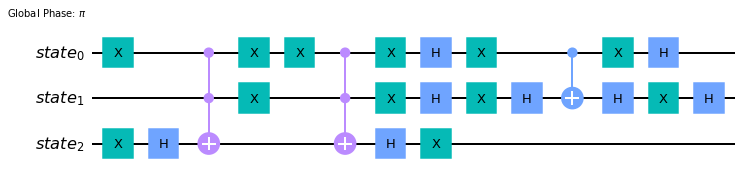

In [21]:
# https://qiskit.org/documentation/stubs/qiskit.aqua.algorithms.Grover.html
grover = Grover(oracle)

grover.grover_operator.draw()

In [22]:

grover_iteration = grover.grover_operator.to_gate()
ctl_grover_iteration = grover_iteration.control()
ctl_grover_iteration.label = "Ctl GrovIt"

In [23]:
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(4)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qft_dagger = qft(4).to_gate().inverse()
qft_dagger.label = "QFT†"

In [24]:

# https://qiskit.org/textbook/ch-algorithms/quantum-counting.html#2.4-Putting-it-Together-

# Initialise all qubits to |+>
for qubit in range(t+n):
    qc.h(qubit)

 # Begin controlled Grover iterations
iterations = 1
for qubit in range(t):
    for i in range(iterations):
        qc.append(ctl_grover_iteration, [qubit] + [*range(t, n+t)])
    iterations *= 2
    
# Do inverse QFT on counting qubits
qc.append(qft_dagger, range(t))

qc.measure(range(t), range(t))

# Display the circuit
qc.draw()   

CircuitError: 'The amount of qubit/clbit arguments does not match the gate expectation.'